dp/dt


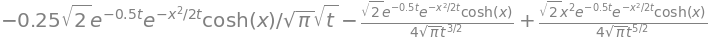


simplified:


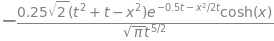

In [33]:
from IPython.display import display
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sp

sp.init_printing(use_latex=True)

x, t = sp.symbols('x t')

p = 1 / sp.sqrt(2 * sp.pi * t) * sp.cosh(x) * sp.exp(-1/2 * t) * sp.exp(- 1 / (2 * t) * x**2)
print('dp/dt')
lhs = sp.diff(p, t)
display(lhs)
print('\nsimplified:')
display(sp.simplify(lhs))


Is my LHS correct?


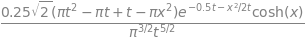

In [34]:
my_lhs = (
    (1 / (sp.sqrt(2 * sp.pi * t)**3))
    * (2 * sp.pi / t * x**2 - 2 * sp.pi * t - 1)
    * (sp.exp(-t / 2) * sp.exp(- x**2 / (2*t)))
    * sp.cosh(x)
)

print('Is my LHS correct?')
display(sp.simplify(sp.simplify(lhs) - sp.simplify(my_lhs)))


# My LHS attempt reorganized

In [35]:
A = sp.exp(-1/2 * t) * sp.exp(-1/2 * x**2 * t**(-1))
display(A)

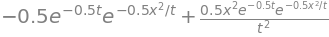

In [36]:
dA = sp.diff(A, t)
display(dA)

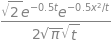

In [37]:
f = A / sp.sqrt(2 * sp.pi * t)
display(f)

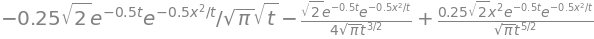

In [38]:
display(sp.diff(f, t))

inside terms


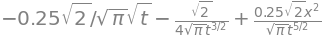

In [39]:
print('inside terms')
inside = sp.expand(sp.diff(f, t) / (sp.exp(-t/2) * sp.exp(- x**2 / (2*t)))) 
display(inside)

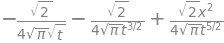

if correct, next line should be 0


In [40]:
my_inside = (
    - 1 / (2 * sp.sqrt(2 * sp.pi * t))
    - 1 / (2 * t * sp.sqrt(2 * sp.pi * t))
    + x**2 / (2 * t**2 * sp.sqrt(2 * sp.pi * t))
)
display(my_inside)
print('if correct, next line should be 0')
display(my_inside - inside)

# Derivatives of p

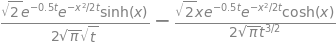

In [41]:
dp_dx = sp.diff(p, x)
display(dp_dx)

In [44]:
display(sp.diff(sp.exp(-1/(2*t) * x**2), x))

In [45]:
display(sp.diff(sp.cosh(x)*sp.exp(-1/(2*t) * x**2),x))

In [46]:
print('check my work')
my_dp_dx = 1 / sp.sqrt(2*sp.pi*t) * sp.exp(-t/2) * (
-x/t * sp.cosh(x) * sp.exp(- x**2 / (2*t))
+ sp.sinh(x) * sp.exp(-x**2 / (2*t))
)
print('If correct, below should be 0')
diff = sp.simplify(my_dp_dx - dp_dx)
display(diff)

check my work
If correct, below should be 0


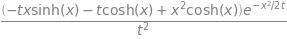

\frac{\left(- t x \sinh{\left(x \right)} - t \cosh{\left(x \right)} + x^{2} \cosh{\left(x \right)}\right) e^{- \frac{x^{2}}{2 t}}}{t^{2}}


In [49]:
sec_first_term = sp.factor(sp.diff(-1/t*x*sp.cosh(x)*sp.exp(-x**2/(2*t)), x))
display(sec_first_term)
print(sp.latex(sec_first_term))

In [53]:
sec_second_term = (
    sp.factor(
        sp.diff(sp.sinh(x) * sp.exp(-x**2/(2*t)), x)
    )
)
display(sec_second_term)
print(sp.latex(sec_second_term))

- \frac{\left(- t \cosh{\left(x \right)} + x \sinh{\left(x \right)}\right) e^{- \frac{x^{2}}{2 t}}}{t}




Right Hand Side
d tanh(x) * p


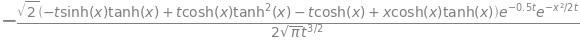

- \frac{\sqrt{2} \left(- t \sinh{\left(x \right)} \tanh{\left(x \right)} + t \cosh{\left(x \right)} \tanh^{2}{\left(x \right)} - t \cosh{\left(x \right)} + x \cosh{\left(x \right)} \tanh{\left(x \right)}\right) e^{- 0.5 t} e^{- \frac{x^{2}}{2 t}}}{2 \sqrt{\pi} t^{\frac{3}{2}}}


In [56]:
print('\n\nRight Hand Side')
print('d tanh(x) * p')
rhs_first_term = sp.factor(sp.diff(sp.tanh(x) * p, x))
display(rhs_first_term)
print(sp.latex(rhs_first_term))
# print('\nd^2 p / dx^2')
# print(sp.diff(p, x, 2))
# print(sp.latex(sp.diff(p, x, 2)))


In [60]:
display(sp.simplify(rhs_first_term * sp.sqrt(2 * sp.pi * t) ))